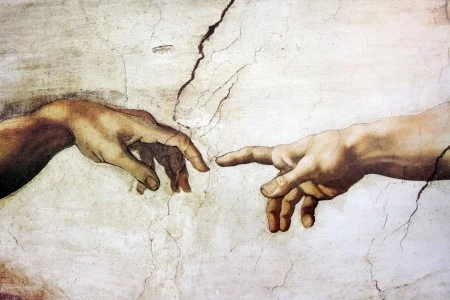

import the alone data:

In [95]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_alon= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles/Yoel636760922573364655Alone.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\alon"
alone = os.listdir(path2)
for i in alone:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\alon/" + i)
    df_alon = pd.concat([df_alon, df])

validation= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\vlidation/Evyatar636771054555711409Alone.csv" )

#f_alon = df_alon.drop(columns=['label'])  
def label_columns(df,x='label'):
    df['label'] = x
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    return df
    
df_alon=label_columns(df_alon,x= 'alone')
validation=label_columns(validation,x= 'alone')

import the right hand data:

In [96]:
df_right= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles/HandRight.csv")

df_rightt= pd.concat([df_right, df_right])
for i in range(1,8):
    df_rightt= pd.concat([df_rightt, df_right])
    
df_rightt =df_rightt.iloc[0:df_alon.shape[0], :]
df_rightt = df_rightt.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})

df_right_v= df_right
df_right_v =df_right_v.iloc[0:validation.shape[0] , :]
df_right_v = df_right_v.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})

combine alon and right hand:

In [97]:
def merge_df(df1,df2):

    index=np.arange(0,df1.shape[0])
    df1['key']=index
    df2['key']=index

    df=pd.merge(df1,df2,how="outer", on="key")
    df = df.drop(columns=['key'])
    df = df.rename(columns={'Frame_ID_x': 'Frame_ID'})
    df = df.drop(columns=['Frame_ID_y'])
    return df

###
df_alon=merge_df(df_alon,df_rightt)
validation=merge_df(validation,df_right_v)

import Spontan and Sync data,
and combine them:

In [98]:
df_Spontan= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\Training\Yoel Raz/Yoel636760921663075813Spontan.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\spontan"
Spontan = os.listdir(path2)
for i in Spontan:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\spontan/" + i)
    df_Spontan = pd.concat([df_Spontan, df])
Spontan_v=pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\vlidation/Evyatar636771052727603804Spontan.csv")

df_Spontan=label_columns(df_Spontan,x= 'Spontan')
Spontan_v=label_columns(Spontan_v,x= 'Spontan')

df_Sync= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles/Yoel636760923490742912Sync.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\Sync"
Sync = os.listdir(path2)
for i in Sync:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\Sync/" + i)
    df_Sync = pd.concat([df_Sync, df])
Sync_v=pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\vlidation/Evyatar636771053639929594Sync.csv")

df_Sync=label_columns(df_Sync,x= 'Sync')
Sync_v=label_columns(Sync_v,x= 'Sync')

df_Sync_Spontan = pd.concat([df_Sync, df_Spontan])
v_Sync_Spontan = pd.concat([Spontan_v, Sync_v])

cleaning:

    hands=2
    
    left and right together on the seam row

In [99]:
df_Sync_Spontan = df_Sync_Spontan[df_Sync_Spontan['hands']==2]
v_Sync_Spontan = v_Sync_Spontan[v_Sync_Spontan['hands']==2]
df_Sdf_Sync_Spontanync = df_Sync_Spontan.reset_index()
v_Sync_Spontan = v_Sync_Spontan.reset_index()
df_Sync_Spontan = pd.merge(df_Sync_Spontan[df_Sync_Spontan.Hand_Type == 'left'], df_Sync_Spontan[df_Sync_Spontan.Hand_Type == 'right'], how='inner', on=['Frame_ID', 'label'])
v_Sync_Spontan = pd.merge(v_Sync_Spontan[v_Sync_Spontan.Hand_Type == 'left'], v_Sync_Spontan[v_Sync_Spontan.Hand_Type == 'right'], how='inner', on=['Frame_ID', 'label'])

combine all data (Sync, Spontan and alon):

In [100]:
df_train = pd.concat([df_Sync_Spontan, df_alon])
validation = pd.concat([validation, v_Sync_Spontan])

In [83]:
validation.label.value_counts()

Spontan    4527
alone      4526
Sync       4526
Name: label, dtype: int64

In [11]:
df_train

,Time_x,Frame_ID,Hand_Type_x,hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,781.3885,61204,left,2,-138.0760,414.4845,-38.023680,116.81080,-168.48520,132.762700,...,-1.565256,120.95600,289.9398,26.45810,270.1054,77.228500,71.32717,0.000000,0.000000,0.0
1,781.3885,61204,left,2,-138.0760,414.4845,-38.023680,116.81080,-168.48520,132.762700,...,-1.671799,177.64600,112.8771,50.73055,358.5342,-5.162216,153.53820,0.000000,0.181193,0.0
2,781.3885,61204,left,2,-138.0760,414.4845,-38.023680,116.81080,-168.48520,132.762700,...,-1.094838,123.65440,144.0882,18.35956,322.2781,-3.383911,60.28876,0.487897,1.946030,0.0
3,526.4006,61204,left,2,-103.3177,337.1211,1.085093,-71.09854,185.03970,-14.114070,...,-1.565256,120.95600,289.9398,26.45810,270.1054,77.228500,71.32717,0.000000,0.000000,0.0
4,526.4006,61204,left,2,-103.3177,337.1211,1.085093,-71.09854,185.03970,-14.114070,...,-1.671799,177.64600,112.8771,50.73055,358.5342,-5.162216,153.53820,0.000000,0.181193,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,461.8609,53766,left,1,-102.3179,210.3977,-118.081600,37.10901,-21.40267,-91.765640,...,-0.083636,29.41341,114.3429,94.25596,124.7965,-28.090870,303.89280,0.000000,0.000000,0.0
34292,461.8775,53768,left,1,-101.5792,208.6293,-118.880300,38.87466,-104.37600,-48.444080,...,-0.084114,29.16825,115.5423,103.06260,133.5927,-27.609040,307.84580,0.000000,0.000000,0.0
34293,461.8940,53770,left,1,-101.2655,205.8851,-119.100300,29.87710,-187.45770,2.925129,...,-0.083685,29.18548,116.7133,107.96240,138.3851,-24.427150,311.64780,0.000000,0.000000,0.0
34294,461.9106,53771,left,1,-100.7877,203.9122,-118.980500,55.15207,-227.72190,13.827830,...,-0.083943,29.66460,119.4981,117.64210,148.6614,-15.520100,319.99360,0.000000,0.000000,0.0


In [348]:
df_train.label

0         Sync
1         Sync
2         Sync
3         Sync
4         Sync
         ...  
36567    alone
36568    alone
36569    alone
36570    alone
36571    alone
Name: label, Length: 132964, dtype: object

same process for test:

In [101]:
df_alon_test= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\test/Itiel636770942529041679Alone.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\alont"
alone = os.listdir(path2)
for i in alone:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\alont/" + i)
    df_alon_test = pd.concat([df_alon_test, df])

df_alon_test=label_columns(df_alon_test,x= 'alone')

df_right= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles/HandRight.csv")

df_rightt= pd.concat([df_right, df_right])
for i in range(1,3):
    df_rightt= pd.concat([df_rightt, df_right])
    
df_rightt =df_rightt.iloc[0:11564 , :]
df_rightt = df_rightt.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})

df_alon_test=merge_df(df_alon_test,df_rightt)

In [102]:
df_Spontan= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\test/Itiel636770940701219076Spontan.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\spontant"
Spontan = os.listdir(path2)
for i in Spontan:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\spontant/" + i)
    df_Spontan = pd.concat([df_Spontan, df])
df_Spontan=label_columns(df_Spontan,x= 'Spontan')

df_Sync= pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\test/Itiel636770941638547912Sync.csv")

path2 =r"C:\Users\User\Downloads\gmar\extraFiles\synct"
Sync = os.listdir(path2)
for i in Sync:
    df = pd.read_csv(r"C:\Users\User\Downloads\gmar\extraFiles\synct/" + i)
    df_Sync = pd.concat([df_Sync, df])
df_Sync=label_columns(df_Sync,x= 'Sync')

df_Sync_Spontan = pd.concat([df_Sync, df_Spontan])

df_Sync_Spontan = df_Sync_Spontan[df_Sync_Spontan['hands']==2]
df_Sdf_Sync_Spontanync = df_Sync_Spontan.reset_index()
df_Sync_Spontan = pd.merge(df_Sync_Spontan[df_Sync_Spontan.Hand_Type == 'left'], df_Sync_Spontan[df_Sync_Spontan.Hand_Type == 'right'], how='inner', on=['Frame_ID','label'])

In [103]:
df_test = pd.concat([df_Sync_Spontan, df_alon_test])

In [16]:
df_test

,Time_x,Frame_ID,Hand_Type_x,hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,865.9976,101109,left,2,-169.46250,228.3028,107.17290,9.920160,1.107885,140.91000,...,-1.855098,122.08460,170.6122,100.16960,276.2068,-9.721443,135.5313,0.0,0.000000,0.0
1,866.0141,101111,left,2,-169.33500,228.0368,109.20630,4.446306,-32.682920,114.00140,...,-1.742294,120.42620,172.9143,100.24080,280.8544,-1.658156,136.4561,0.0,0.000000,0.0
2,866.0306,101112,left,2,-169.05510,227.6669,109.89220,32.247900,-42.621700,79.02841,...,-1.695856,119.10070,173.9150,99.89700,281.7841,1.465358,136.2225,0.0,0.000000,0.0
3,866.0480,101114,left,2,-167.91790,226.6983,110.49990,63.069720,-46.391580,23.85685,...,-1.612333,116.50250,176.2925,98.74449,282.0415,6.572340,135.0247,0.0,0.000000,0.0
4,866.0641,101116,left,2,-166.95720,225.7605,110.46400,55.636890,-61.350080,-13.61763,...,-1.540096,114.48360,179.7164,98.17319,279.3752,9.066888,133.0133,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11559,796.7517,50329,left,1,-62.14733,282.7198,62.15659,-90.006310,-129.346800,-50.10587,...,-0.097211,30.78333,149.5198,116.18190,165.0160,51.386530,335.0848,0.0,0.377471,0.0
11560,796.7842,50331,left,1,-64.38816,276.7341,60.39418,-51.703520,-204.264300,-56.99268,...,-0.097091,26.78212,147.8971,114.43230,167.7941,42.790000,325.7108,0.0,0.395557,0.0
11561,796.8187,50333,left,1,-65.33954,272.7191,59.17199,-27.796780,-111.888100,-42.74572,...,-0.092136,23.50534,146.1402,112.75180,169.1038,37.792740,319.2425,0.0,0.418047,0.0
11562,796.8510,50336,left,1,-67.02361,268.6757,57.91473,-31.616060,-76.331120,-24.73411,...,-0.084970,21.64643,144.2002,111.11120,169.6441,37.298340,316.6661,0.0,0.483748,0.0


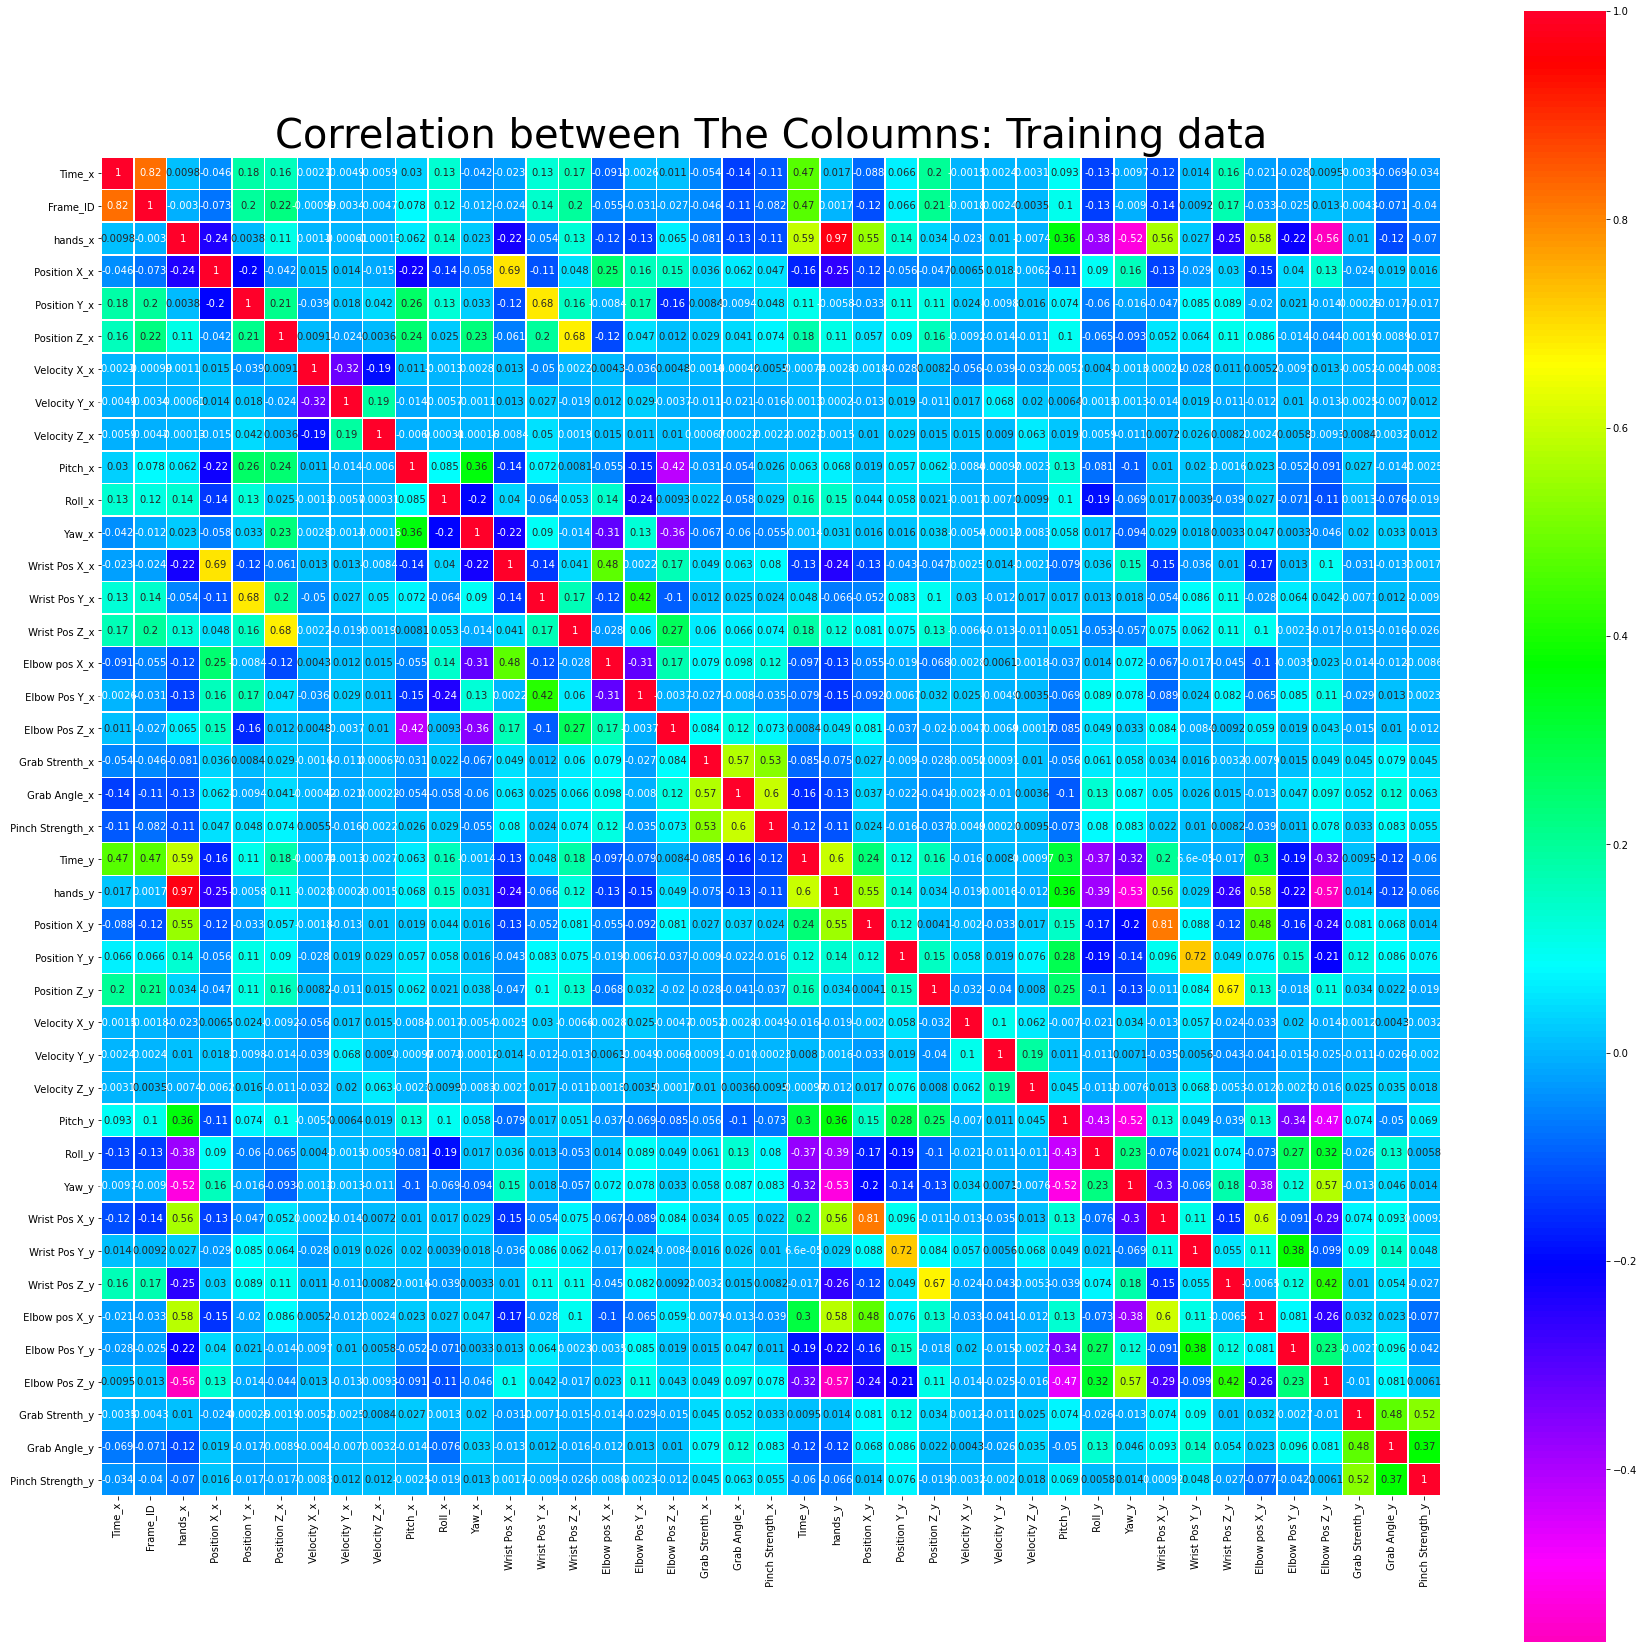

In [15]:
import seaborn as sns
csfont = {'fontname':'Comic Sans MS'}
#get correlations of each features in dataset
plt.figure(figsize=(30,30))
axes=sns.heatmap(df_train.corr(method ='kendall'),annot=True,square=True,cmap="gist_rainbow_r", linewidths=.5)
axes.set_title("Correlation between The Coloumns: Training data",fontsize=40)

plt.show()

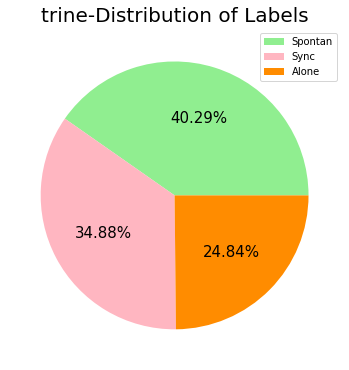

In [104]:
plt.subplots(figsize=(6,7))
sorted_df = df_train.sort_values(by=['label'])
plt.pie(sorted_df['label'].value_counts(), colors = ['lightgreen', 'lightpink' , 'darkorange'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('trine-Distribution of Labels' , fontdict = {'fontsize' : 20})
plt.legend(["Spontan" , "Sync" , "Alone"] , loc=1)

plt.show()

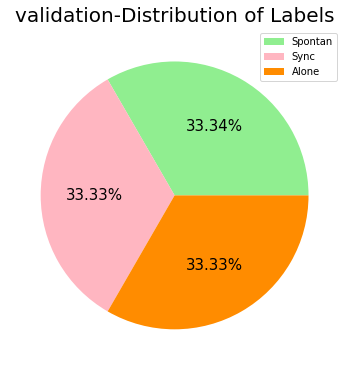

In [105]:
plt.subplots(figsize=(6,7))
sorted_df = validation.sort_values(by=['label'])
plt.pie(sorted_df['label'].value_counts(), colors = ['lightgreen', 'lightpink' , 'darkorange'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('validation-Distribution of Labels' , fontdict = {'fontsize' : 20})
plt.legend(["Spontan" , "Sync" , "Alone"] , loc=1)

plt.show()

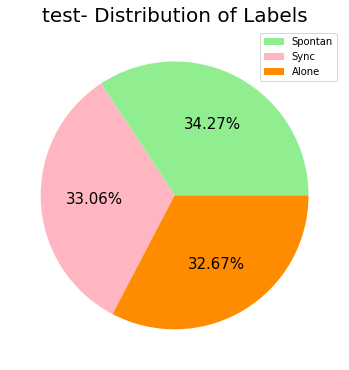

In [106]:
plt.subplots(figsize=(6,7))
sorted_df = df_test.sort_values(by=['label'])
plt.pie(sorted_df['label'].value_counts(), colors = ['lightgreen', 'lightpink' , 'darkorange'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('test- Distribution of Labels' , fontdict = {'fontsize' : 20})
plt.legend(["Spontan" , "Sync" , "Alone"] , loc=1)

plt.show()

__improv the dataset:__

take every 5 row:

In [108]:
def Dilution(df):
    index=np.arange(0,df.shape[0])
    df['key']=index

    df= df[df['key']%5==0]
    df= df.drop(columns=['key'])
    return df
    
df_train=Dilution(df_train)
validation=Dilution(validation)
df_test=Dilution(df_test)

drop the irrelevant columns and null:

In [107]:
df_train = df_train.drop(columns=['Hand_Type_x','hands_x','Hand_Type_y','hands_y','Frame_ID'])
validation = validation.drop(columns=['Hand_Type_x','hands_x','Hand_Type_y','hands_y','Frame_ID','index_x','index_y'])
df_test = df_test.drop(columns=['Hand_Type_x','hands_x','Hand_Type_y','hands_y','Frame_ID'])

df_train.dropna(inplace=True)
validation.dropna(inplace=True)
df_test.dropna(inplace=True)

Unify all three rows:

In [109]:
def Unify_rows(df):

    df['key'] = np.arange(0,df.shape[0])

    df0 = df[df['key']%3 == 0]
    df0['key'] = np.arange(0,df0.shape[0])

    df1 = df[df['key']%3 == 1]
    df1['key'] = np.arange(0,df1.shape[0])

    df2 = df[df['key']%3 == 2]
    df2['key'] = np.arange(0,df2.shape[0])

    df = pd.merge(df0, df1, how='inner', on=['key'])
    df = pd.merge(df, df2, how='inner', on=['key'])
    df = df.drop(columns=['key'])
    return df

df_train=Unify_rows(df_train)
validation=Unify_rows(validation)
df_test=Unify_rows(df_test)

<ipython-input-109-7459400539ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['key'] = np.arange(0,df0.shape[0])
<ipython-input-109-7459400539ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['key'] = np.arange(0,df1.shape[0])
<ipython-input-109-7459400539ec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [114]:
df_train

,Time_x_x,Position X_x_x,Position Y_x_x,Position Z_x_x,Velocity X_x_x,Velocity Y_x_x,Velocity Z_x_x,Pitch_x_x,Roll_x_x,Yaw_x_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,781.3885,-138.07600,414.4845,-38.023680,116.810800,-168.48520,132.762700,1.559643,1.067660,1.550665,...,-1.669594,120.53270,291.4823,26.73980,279.43510,85.66382,70.25575,0.0,0.000000,0.000000
1,526.4666,-106.88910,335.1552,-0.365379,-18.343030,-151.81190,-11.198190,1.216755,0.563709,1.343518,...,-1.988221,124.61710,308.3313,29.07835,290.25210,107.73330,71.86147,0.0,0.000000,0.000000
2,526.5663,-104.83750,300.5803,-0.283326,-5.675153,-478.01040,0.284566,1.093600,0.414393,1.352692,...,-2.153949,125.09040,301.6690,28.04075,274.25080,84.86823,43.96111,0.0,0.000000,0.000000
3,508.9881,-137.94750,169.1950,12.659530,-105.321100,-35.16204,-55.921960,1.598290,1.564687,-3.038959,...,-2.188871,130.46480,303.9923,27.27237,281.28120,88.17188,40.72072,0.0,0.003039,0.000000
4,526.6660,-99.50933,243.1856,-4.076824,-35.528500,-520.77610,-52.692260,1.079982,0.289547,1.413785,...,-1.111785,180.05920,156.8948,20.71077,287.40410,-64.18526,71.28902,1.0,2.898259,0.186381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,460.6681,-118.71560,217.8566,-69.024640,-57.496140,-211.78170,-183.370200,0.583474,0.084711,0.770298,...,-0.474724,55.92508,284.0247,72.88213,178.82430,171.56590,284.96680,0.0,0.415522,0.000000
9022,460.9168,-130.02050,181.0273,-81.428750,66.248700,-16.44133,-41.451350,0.388806,2.850952,0.957689,...,-0.147913,39.82242,196.4814,117.43490,196.80120,93.84808,311.52870,0.0,0.189500,0.000000
9023,461.1651,-120.34680,157.7782,-78.897560,13.902360,-11.51777,-9.683330,1.179319,-3.030854,1.147931,...,-0.104717,37.43237,106.9329,133.89270,197.57490,20.59924,333.96020,0.0,0.000000,0.000000
9024,461.4136,-118.73650,175.7263,-81.770690,42.626870,70.31339,9.709199,1.301709,-3.027394,1.277058,...,-0.157498,34.72141,90.7566,34.50654,93.67182,-11.45386,278.24980,0.0,0.000000,0.000000


In [115]:
validation

,Time_x_x,Position X_x_x,Position Y_x_x,Position Z_x_x,Velocity X_x_x,Velocity Y_x_x,Velocity Z_x_x,Pitch_x_x,Roll_x_x,Yaw_x_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,518.8087,-97.60160,164.1213,42.812550,104.258900,-491.67300,-55.42755,2.939312,0.045867,1.661706,...,-0.300449,50.22053,202.4105,82.178560,198.7624,32.08682,228.42370,0.0,0.466381,0.000000
1,519.0573,-48.03088,134.0193,45.004870,247.570700,11.43652,16.64889,0.979900,0.452308,1.268474,...,-0.299897,49.88375,203.9540,86.263790,209.3764,48.00550,236.93360,0.0,0.568460,0.000000
2,519.3057,-13.28533,167.2970,24.489080,-51.345820,215.67230,-169.91490,0.908828,1.232877,0.571521,...,-0.315307,47.18960,219.2856,86.159940,216.0508,71.15929,234.64150,0.0,0.113478,0.000000
3,519.5541,-41.87076,201.0930,-12.696330,-85.365220,129.37830,-52.63156,0.819756,1.307274,0.381334,...,-0.264727,38.16507,225.4814,33.639720,187.2801,90.04680,212.51680,0.0,0.057985,0.000000
4,519.8030,-60.80044,257.3281,3.957159,-89.239650,212.37820,167.87990,1.230283,1.080151,0.961294,...,-0.228913,41.69013,224.2552,79.280510,205.5467,82.40811,239.49960,0.0,0.264739,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,410.6643,-87.57944,136.0505,20.670180,16.987680,186.87880,-109.80430,1.162551,0.237506,1.322582,...,-0.785667,182.74520,264.5421,5.950747,296.5971,56.12751,69.26366,0.0,1.334089,0.566832
1498,410.7306,-90.35178,150.9589,17.494240,-29.700420,209.87070,-13.95418,1.088973,0.183976,1.289946,...,-0.760349,179.85010,266.5807,5.365802,307.3201,65.08429,65.01523,0.0,1.259503,0.837101
1499,410.7803,-90.01390,159.9440,18.678640,61.539890,154.46960,34.69133,1.012576,0.179731,1.266888,...,-0.373773,180.64990,257.7939,15.640990,321.3108,64.20156,71.71191,0.0,0.898818,0.357532
1500,410.8471,-91.14999,174.2245,22.364410,-8.574543,182.87800,71.54300,0.955640,0.140391,1.224759,...,-0.082028,172.83200,238.1172,25.177560,305.7388,44.50388,97.68344,0.0,0.105529,0.000000


In [116]:
df_test

,Time_x_x,Position X_x_x,Position Y_x_x,Position Z_x_x,Velocity X_x_x,Velocity Y_x_x,Velocity Z_x_x,Pitch_x_x,Roll_x_x,Yaw_x_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,865.9976,-169.46250,228.3028,107.17290,9.920160,1.107885,140.91000,1.771344,1.344641,2.369029,...,-1.303535,104.99590,215.3572,90.55413,263.7489,39.650420,128.6186,0.0,0.056037,0.0
1,866.2460,-160.65730,220.5349,83.03739,-19.890190,-4.798642,-200.79440,1.296204,1.377481,0.868697,...,-0.976639,91.37906,289.2342,67.34812,257.0833,122.615000,115.3534,0.0,0.000000,0.0
2,866.4614,-173.98140,229.9269,66.65142,-87.766540,87.310650,-20.52651,1.285515,1.407924,0.624060,...,-0.939819,92.70585,319.0571,57.51746,265.4344,158.714000,102.0064,0.0,0.000000,0.0
3,866.7101,-217.10530,303.0289,56.78129,-59.897240,463.758300,-67.53155,1.300090,1.570930,0.149710,...,-1.039645,108.31610,241.0026,61.56848,267.7542,68.030120,108.3055,0.0,0.000000,0.0
4,866.9584,-198.20140,324.1580,62.45176,204.437400,-349.334900,12.00607,1.367495,1.566186,0.258059,...,-1.006445,150.49160,131.2274,80.49442,330.3885,-8.245216,156.0510,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,794.4520,-83.99932,327.7724,35.64857,7.198792,-9.107235,9.55529,0.584077,2.141395,0.642708,...,-0.000760,59.01227,134.5896,131.50840,164.4960,108.517800,384.0284,0.0,0.341742,0.0
2194,794.9517,-61.65512,334.4554,43.16432,45.429210,22.855330,42.77046,0.622357,0.759120,0.886309,...,0.021866,84.77635,157.2866,87.00185,158.9893,32.931960,320.6710,0.0,0.311977,0.0
2195,795.4507,-41.63026,317.3832,52.24089,-49.821380,-54.107020,17.26069,-0.237842,-0.100511,0.984036,...,0.282836,187.42410,169.9443,142.02520,175.8267,47.639420,387.9519,0.0,0.529783,0.0
2196,795.9506,-26.71039,295.4025,54.86127,32.016020,-10.398510,13.03996,-0.027311,-0.134547,1.041258,...,0.295110,176.82400,163.1091,143.80750,185.4249,52.113480,395.1617,0.0,0.314864,0.0


__split the data into x and y sets:__

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train = df_train.drop(columns=['label','label_x','label_y'])
y_train = df_train.label
X_test = validation.drop(columns=['label','label_x','label_y'])
y_test = validation.label

print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (9026, 114)
Training Labels: (9026,)
Testing FeatureSet: (899, 114)
Testing Labels: (899,)


StandardScaler:

In [120]:
scaler = StandardScaler()
a = scaler.fit_transform(X_train)
X_train = pd.DataFrame(a, columns=X_train.columns)

b = scaler.fit_transform(X_test)
X_test = pd.DataFrame(b, columns=X_test.columns)

__PCA:__

In [112]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

47

In [121]:
pca = PCA(n_components = 47)
X_train47 = pca.fit_transform(X_train)
X_test47 = pca.transform(X_test)

In [122]:
def pred(model):
    model.fit(X_train47,y_train)
    y_pred = model.predict(X_test47)
    print(model , "Accuracy :  " , accuracy_score(y_test, y_pred))
  

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


__models:__

In [115]:
pred(DecisionTreeClassifier())
pred(LogisticRegression())
pred(RandomForestClassifier())
pred(KNeighborsClassifier(n_neighbors=17))
pred(AdaBoostClassifier())
pred(XGBClassifier())
pred(GradientBoostingClassifier())

DecisionTreeClassifier() Accuracy :   0.7741935483870968


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Accuracy :   0.8576195773081201
RandomForestClassifier() Accuracy :   0.8709677419354839
KNeighborsClassifier(n_neighbors=17) Accuracy :   0.8320355951056729
AdaBoostClassifier() Accuracy :   0.8553948832035595
[22:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) Accuracy :   0.8442714126807565
GradientBoostingClassifier() Accuracy :   0.8553948832035595


In [116]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = XGBClassifier()
vr = VotingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred(vr)
vr = StackingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred(vr)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                       

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[22:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

as we can see, the __RForest__ is the best model

__runing on the test:__

In [117]:
X_train = df_train.drop(columns=['label','label_x','label_y'])
y_train = df_train.label
X_test = df_test.drop(columns=['label','label_x','label_y'])
y_test = df_test.label

print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (9026, 114)
Training Labels: (9026,)
Testing FeatureSet: (2198, 114)
Testing Labels: (2198,)


In [126]:
pca = PCA(n_components = 47)
X_train19 = pca.fit_transform(X_train)
X_test19_f = pca.transform(X_test_f)

In [129]:
pred(RandomForestClassifier())

RandomForestClassifier()  Accuracy: 0.8654060066740823 


Training Accuracy : 1.0
Testing Accuracy : 0.8654060066740823

              precision    recall  f1-score   support

     Spontan       0.74      0.93      0.82       302
        Sync       0.91      0.67      0.77       302
       alone       1.00      1.00      1.00       295

    accuracy                           0.87       899
   macro avg       0.88      0.87      0.86       899
weighted avg       0.88      0.87      0.86       899



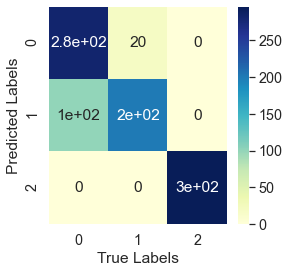

In [125]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

results={}
RForest = RandomForestClassifier()
RForest.fit(X_train, y_train)
    #model prediction
y_pred = RForest.predict(X_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[RForest]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", RForest.score(X_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

__conclution:__

__the RForest model get the best Accuracy: 0.865__

n_components = 47